In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.manifold import TSNE #for visual

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
file_path = 'cbow.txt'
with open(file_path, 'r') as file:
    file_content = file.read()

In [3]:
file_content

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and

In [5]:
sentences = file_content.split('.')


In [6]:
sentences

['The speed of transmission is an important point of difference between the two viruses',
 ' Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus',
 ' The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days',
 ' This means that influenza can spread faster than COVID-19',
 ' Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza',
 ' In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission',
 ' The reproductive number – the number of secondary infections generated from one infected individual – is under

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index)+1

In [10]:
tokenized_sentence = tokenizer.texts_to_sequences(sentences)

In [11]:
window_size = 3
data, labels = [], []
for sentence in tokenized_sentence:
    for i, target_word in enumerate(sentence):
        context = [
            sentence[j] for j in range(i - window_size, i+ window_size+1 )
            if j != i and 0<= j<len(sentence)
        ]
        data.append(context)
        labels.append(target_word)

data  = pad_sequences(data)
labels = np.array(labels)

In [13]:
embedding_size = 50

model = Sequential()
model.add(Embedding(input_dim= total_words, output_dim = embedding_size, input_length = window_size*2))
model.add(GlobalAveragePooling1D())
model.add(Dense(total_words, activation='softmax'))


In [14]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 50)             5150      
                                                                 
 global_average_pooling1d (  (None, 50)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 103)               5253      
                                                                 
Total params: 10403 (40.64 KB)
Trainable params: 10403 (40.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.fit(data, labels, epochs=500, verbose=1)

Epoch 1/500
7/7 [==============================] - 0s 1ms/step - loss: 4.6354 - accuracy: 0.0051
Epoch 2/500
7/7 [==============================] - 0s 931us/step - loss: 4.6262 - accuracy: 0.0354
Epoch 3/500
7/7 [==============================] - 0s 619us/step - loss: 4.6188 - accuracy: 0.0758
Epoch 4/500
7/7 [==============================] - 0s 845us/step - loss: 4.6117 - accuracy: 0.1162
Epoch 5/500
7/7 [==============================] - 0s 784us/step - loss: 4.6045 - accuracy: 0.1364
Epoch 6/500
7/7 [==============================] - 0s 1ms/step - loss: 4.5969 - accuracy: 0.1364
Epoch 7/500
7/7 [==============================] - 0s 586us/step - loss: 4.5888 - accuracy: 0.1515
Epoch 8/500
7/7 [==============================] - 0s 774us/step - loss: 4.5807 - accuracy: 0.1667
Epoch 9/500
7/7 [==============================] - 0s 943us/step - loss: 4.5718 - accuracy: 0.1869
Epoch 10/500
7/7 [==============================] - 0s 744us/step - loss: 4.5623 - accuracy: 0.1869
Epoch 11/500


In [18]:
word_emedings = model.get_layer(index = 0).get_weights()[0]

In [19]:
word_emedings

array([[ 0.40750253, -0.24277544, -0.19371423, ..., -0.58965254,
         0.32421437,  0.46106732],
       [-0.11648292,  0.49954617,  0.058388  , ..., -0.8491483 ,
         1.5545925 , -0.49720642],
       [ 0.7059294 ,  0.8674027 ,  0.8951045 , ...,  1.3184283 ,
         0.41745362, -0.81499547],
       ...,
       [-1.0549915 , -0.7825025 ,  1.0559955 , ..., -0.76703715,
        -0.8649664 ,  0.05022986],
       [-0.74018633, -1.0116724 ,  0.7629288 , ...,  0.3131454 ,
        -0.81912667, -0.17440665],
       [-0.4162696 , -0.59298307,  0.6313633 , ...,  0.46191633,
        -1.1651635 , -1.0167689 ]], dtype=float32)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

target_word = 'influenza'
target_embedding = word_emedings[tokenizer.word_index[target_word]]

similarities = cosine_similarity(target_embedding.reshape(1, -1), word_emedings)[0]
most_similar_indices = similarities.argsort()[-5:][::-1]

most_similar_words = [word for word, idx in tokenizer.word_index.items() if idx in most_similar_indices]

print(f"Most similar words to '{target_word}': {most_similar_words}")

Most similar words to 'influenza': ['influenza', 'spread', 'contrast', 'we', 'learning']


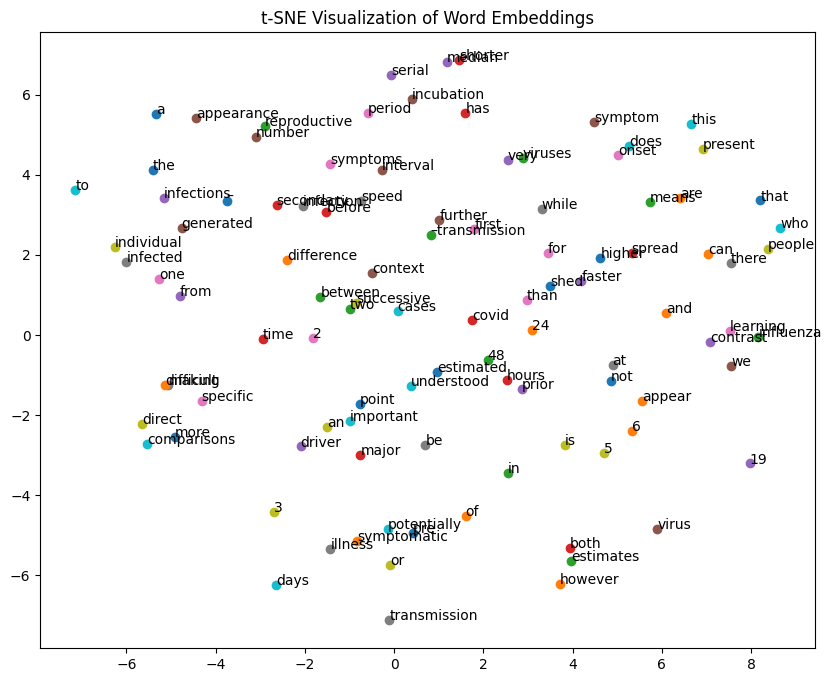

In [22]:
# Fit t-SNE model on word embeddings
tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_emedings)

# Visualization
plt.figure(figsize=(10, 8))
for word, idx in tokenizer.word_index.items():
    plt.scatter(word_embeddings_2d[idx, 0], word_embeddings_2d[idx, 1])
    plt.annotate(word, (word_embeddings_2d[idx, 0], word_embeddings_2d[idx, 1]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()